<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB
Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
ra

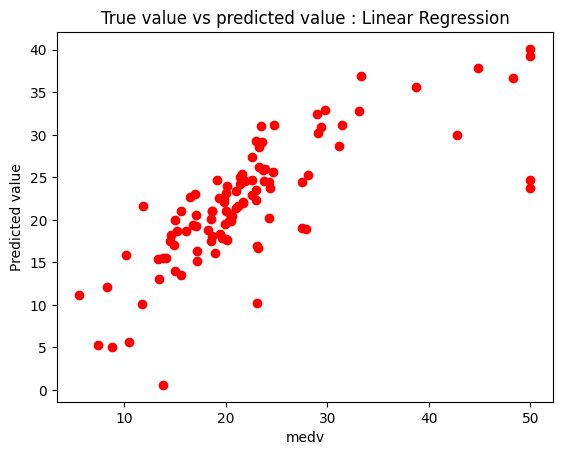

C:\Users\kunal\AppData\Local\Temp\ipykernel_3640\3888989733.py:69: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Boston['medv'], bins=30)


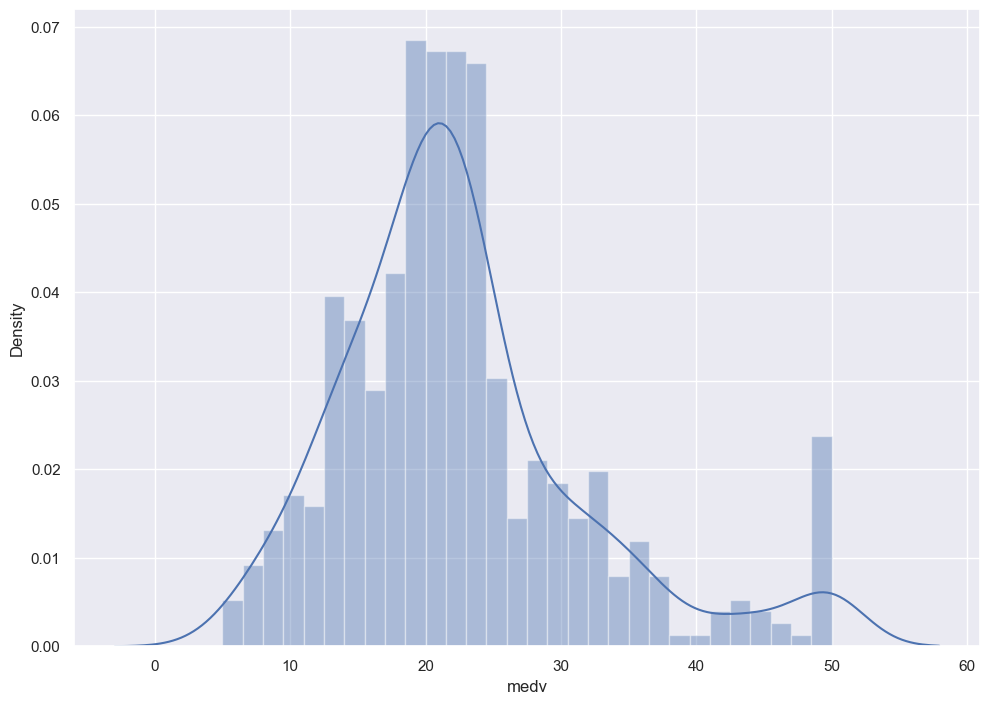

(404, 2)
(102, 2)
(404,)
(102,)
The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701
The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


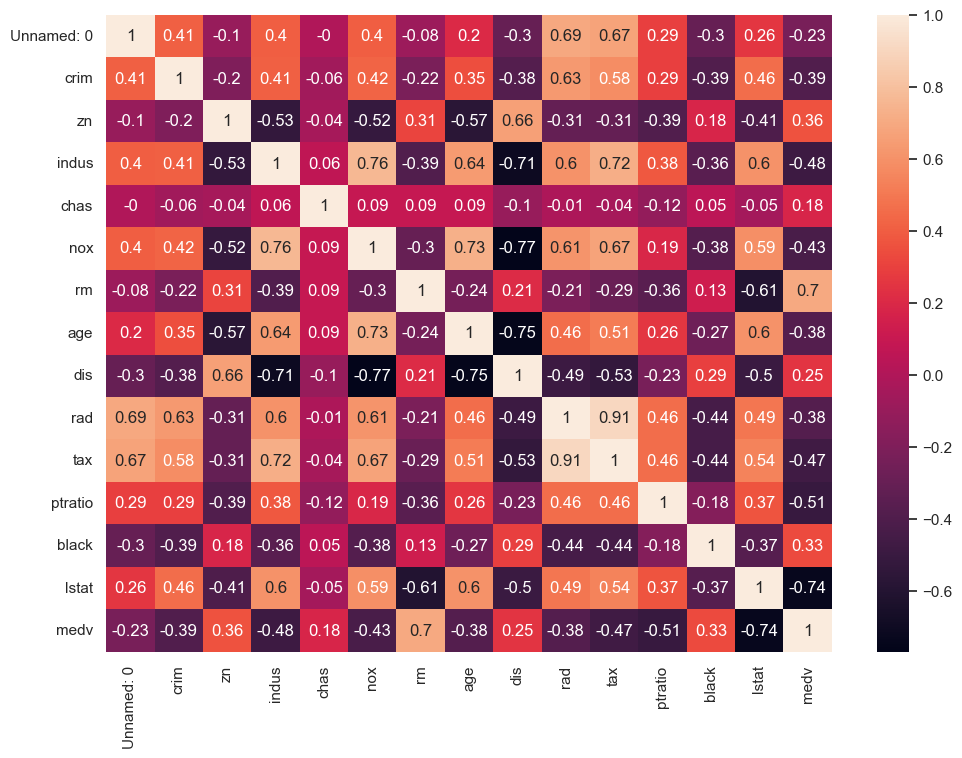

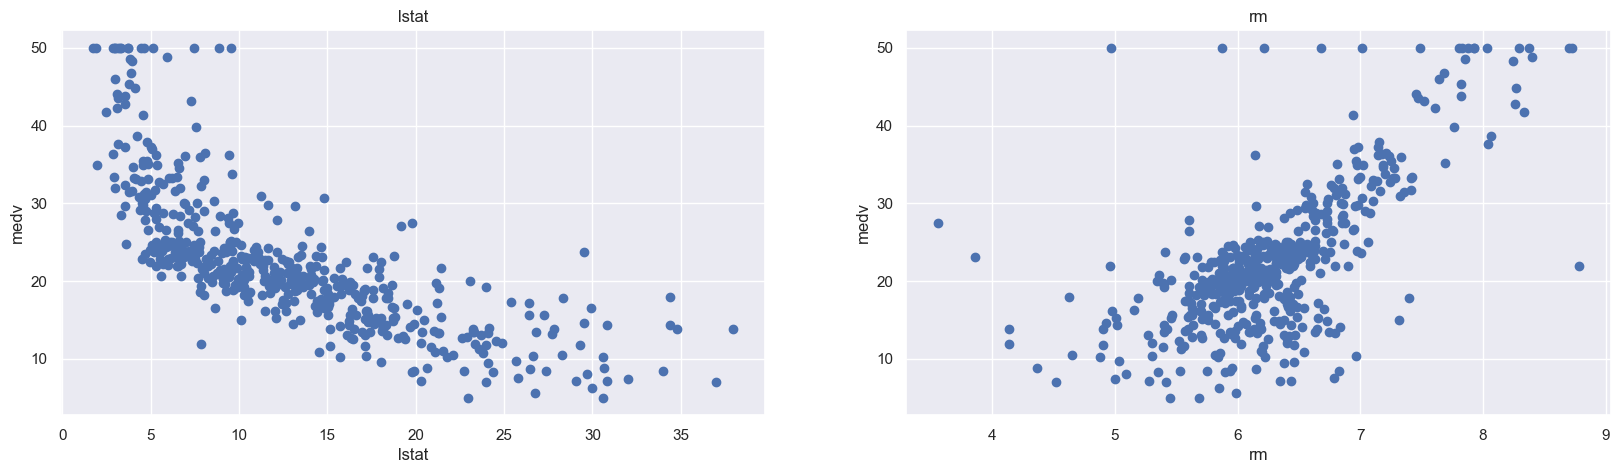

In [1]:
# Importing necessary libraries
import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for advanced visualizations
from sklearn.model_selection import train_test_split  # for splitting dataset
from sklearn.linear_model import LinearRegression  # for applying linear regression
from sklearn.metrics import mean_squared_error, r2_score  # for evaluating the model
from scipy import stats  # for statistical operations (if required)

# Load the dataset into a pandas DataFrame
Boston = pd.read_csv('b.csv')

# Display the first few rows of the dataset to understand its structure
Boston.head()

# Get a summary of the dataset, including data types and non-null values
Boston.info()

# Statistical summary of the dataset (mean, standard deviation, etc.)
Boston.describe()

# Check for missing values in the dataset
missing_values = Boston.isna().sum()
print(missing_values)

# List of columns where missing values are found
na_columns = ['crim', 'zn', 'indus', 'chas', 'age', 'lstat']

# Fill missing values in the specified columns with the mean of the respective column
Boston[na_columns] = Boston[na_columns].fillna(Boston.mean())

# Print the updated dataset to verify missing values are handled
print(Boston)

# Separate the target variable (medv) from the dataset
target = Boston['medv']
print(target)

# Define the feature set X by dropping the target column (medv)
X = Boston.drop(["medv"], axis=1)

# Define the target variable y as 'medv'
y = Boston["medv"]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Linear Regression model instance
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Plot a scatter plot to compare the actual values (y_test) with the predicted values (y_pred)
plt.scatter(y_test, y_pred, c='red')
plt.xlabel("medv")  # Label for the x-axis (True values)
plt.ylabel("Predicted value")  # Label for the y-axis (Predicted values)
plt.title("True value vs predicted value : Linear Regression")  # Title of the plot
plt.show()  # Display the plot

# Set the figure size for Seaborn plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot the distribution of the target variable (medv) to check its spread and skewness
sns.distplot(Boston['medv'], bins=30)
plt.show()

# Generate the correlation matrix to check the relationships between features
correlation_matrix = Boston.corr().round(2)

# Visualize the correlation matrix using a heatmap (annot=True to display correlation values)
sns.heatmap(data=correlation_matrix, annot=True)

# Plot relationships between selected features ('lstat' and 'rm') and the target variable (medv)
plt.figure(figsize=(20, 5))  # Set the figure size for the plot
features = ['lstat', 'rm']  # List of features to plot
target = Boston['medv']  # The target variable

# Loop through the selected features and create scatter plots
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)  # Create subplots for each feature
    x = Boston[col]  # Feature values
    y = target  # Target values (medv)
    plt.scatter(x, y, marker='o')  # Scatter plot
    plt.title(col)  # Title of each subplot (feature name)
    plt.xlabel(col)  # Label for x-axis
    plt.ylabel('medv')  # Label for y-axis

# Create a new feature set X using only 'lstat' and 'rm' columns
X = pd.DataFrame(np.c_[Boston['lstat'], Boston['rm']], columns=['lstat','rm'])

# The target variable remains 'medv'
Y = Boston['medv']

# Split the data again into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# Print the shapes of training and testing sets to ensure correct splitting
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# Create another instance of Linear Regression for the smaller feature set
lin_model = LinearRegression()

# Fit the model using the training data
lin_model.fit(X_train, Y_train)

# Make predictions using the training set
y_train_predict = lin_model.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE) for the training set
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predict))

# Calculate the R² score for the training set
r2_train = r2_score(Y_train, y_train_predict)

# Make predictions using the test set
y_test_predict = lin_model.predict(X_test)

# Calculate the RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))

# Calculate the R² score for the test set
r2_test = r2_score(Y_test, y_test_predict)

# Print the model performance metrics for the training set
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))  # Display RMSE for the training set
print('R2 score is {}'.format(r2_train))  # Display R² score for the training set

# Print the model performance metrics for the testing set
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))  # Display RMSE for the test set
print('R2 score is {}'.format(r2_test))  # Display R² score for the test set


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Accuracy on test set: 83.22%
Cross-Validation Score: 78.57%
Confusion Matrix:
 [[78  7]
 [17 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        85
           1 

c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


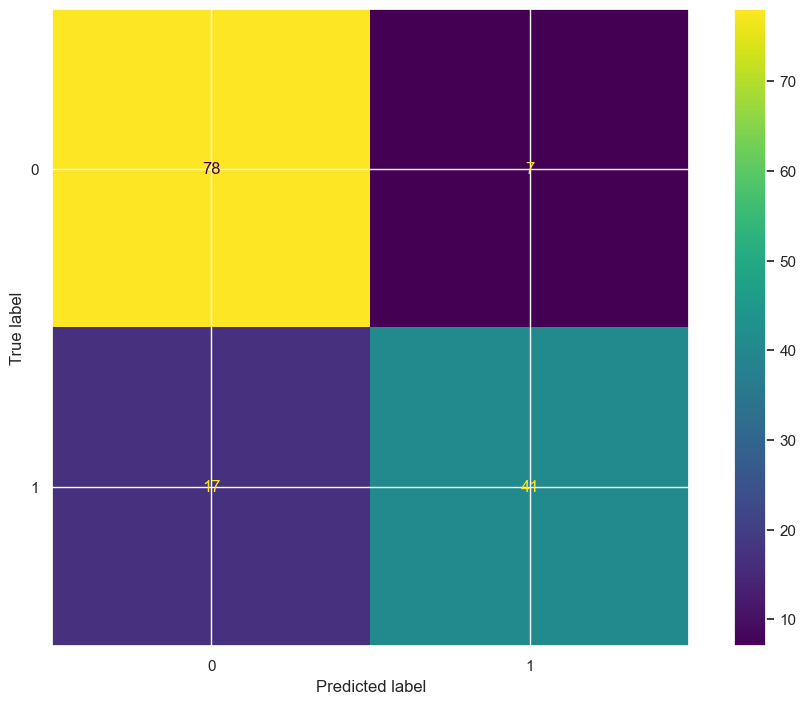

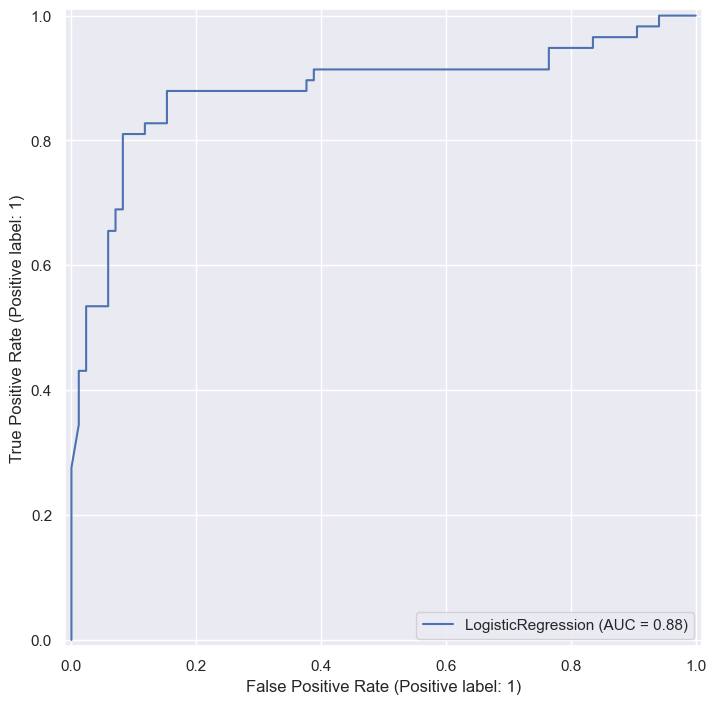

In [2]:
# Import necessary libraries

#EXP02

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay

# Load the Titanic dataset
df = pd.read_csv('t.csv')

# Display the first five rows of the dataset
df.head()

# Display information about the dataset, including data types and missing values
df.info()

# Select relevant features for analysis
df = df[['Survived', 'Age', 'Sex', 'Pclass']]

# Apply one-hot encoding to categorical variables (Sex and Pclass)
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])

# Drop rows with missing values
df.dropna(inplace=True)

# Define features (X) and target variable (y)
x = df.drop('Survived', axis=1)  # Features
y = df['Survived']                # Target variable

# Split the dataset into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=0)

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model's accuracy on the test set
accuracy = model.score(x_test, y_test)
print(f'Accuracy on test set: {accuracy:.2%}')  # Print accuracy as a percentage

# Perform 5-fold cross-validation to assess model stability
cv_score = cross_val_score(model, x, y, cv=5).mean()
print(f'Cross-Validation Score: {cv_score:.2%}')  # Print mean cross-validation score

# Make predictions on the test set
y_predicted = model.predict(x_test)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_predicted)
print('Confusion Matrix:\n', cm)

# Display the confusion matrix visually
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

# Generate and print a classification report
report = classification_report(y_test, y_predicted)
print('Classification Report:\n', report)

# Visualize the ROC curve
RocCurveDisplay.from_estimator(model, x_test, y_test)

# Example prediction: Predict survival for a female passenger aged 30 in 1st class
female = [[30, 1, 0, 1, 0, 0]]  # Features: Age, Sex_female, Sex_male, Pclass_1, Pclass_2, Pclass_3
predicted_class = model.predict(female)[0]
print(f'Predicted class for female passenger: {predicted_class}')  # Print predicted class (0 or 1)

# Calculate the probability of survival for the same female passenger
probability = model.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')  # Print probability of survival as a percentage


Rows: 48842
Columns: 15

Features:
 ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Missing values: 0

Unique values:
 age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 

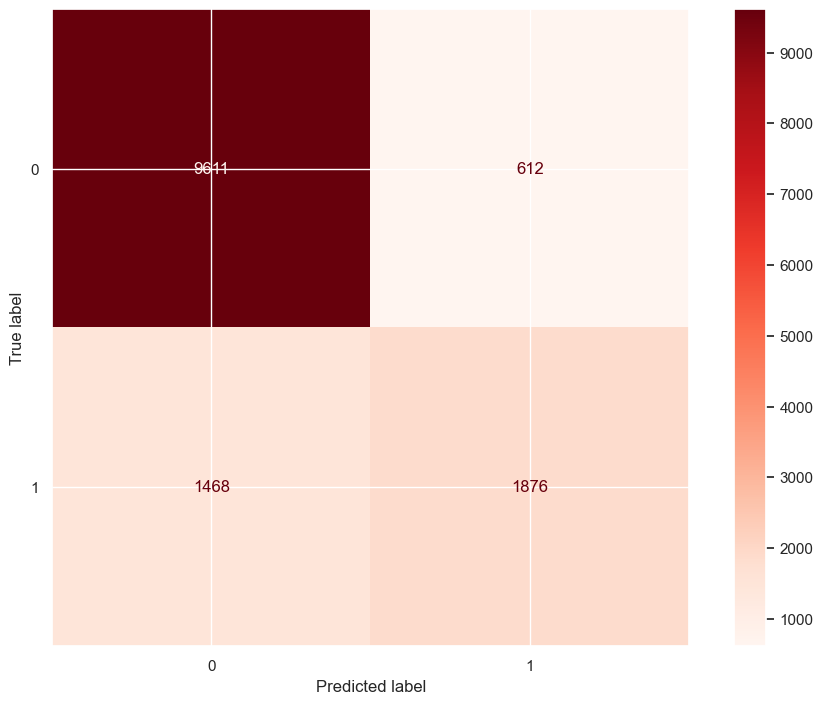

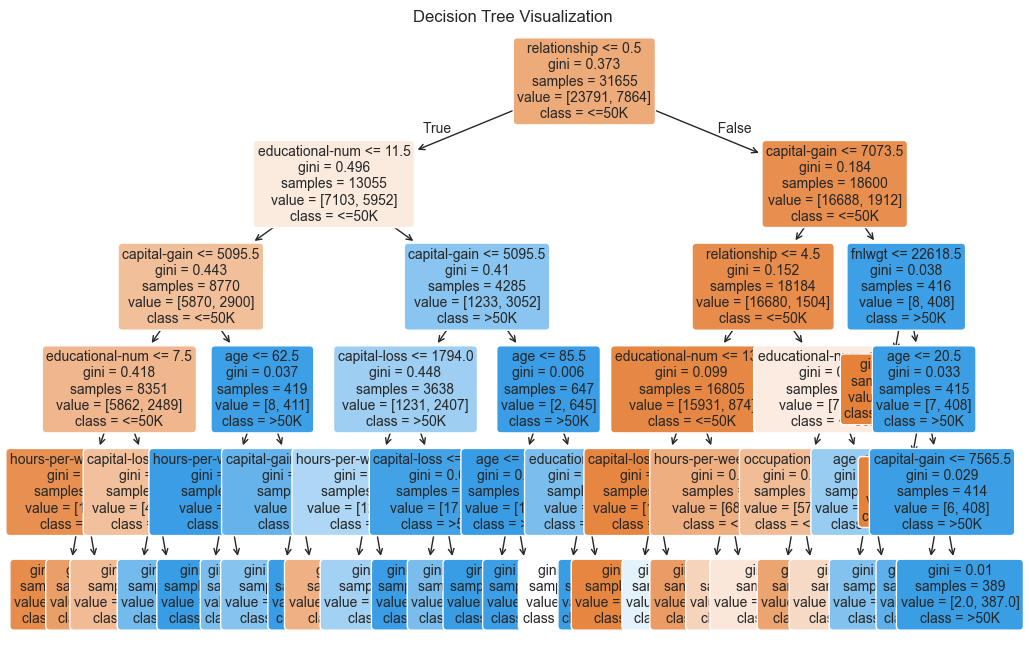

In [3]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the Adult dataset
adult_dataset_path = "a.csv"

# Function to load the Adult dataset
def load_adult_data(adult_path=adult_dataset_path):
    # Join the given path and return the DataFrame after reading the CSV file
    csv_path = os.path.join(adult_path)
    return pd.read_csv(csv_path)

# Load the adult dataset and assign it to a variable
df = load_adult_data()

# Display the top 3 rows of the dataset
df.head(3)

# Print the shape of the DataFrame to see the number of rows and columns
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Print the names of the features (columns)
print("\nFeatures:\n", df.columns.tolist())

# Check for missing values in the dataset
print("\nMissing values:", df.isnull().sum().values.sum())

# Check the number of unique values in each column
print("\nUnique values:\n", df.nunique())

# Display basic information about the dataset
df.info()

# Display descriptive statistics for the dataset
df.describe()

# Check for missing values represented as '?'
df_check_missing_workclass = (df['workclass'] == '?').sum()  # Count missing values in 'workclass'
df_check_missing_occupation = (df['occupation'] == '?').sum()  # Count missing values in 'occupation'

# Create a DataFrame to check for all missing values represented as '?'
df_missing = (df == '?').sum()

# Calculate the percentage of missing values for each column
percent_missing = (df == '?').sum() * 100 / len(df)

# Apply a lambda function to check the count of non-'?' values in each row
df.apply(lambda x: x != '?', axis=1).sum()

# Select all categorical variables from the DataFrame
df_categorical = df.select_dtypes(include=['object'])

# Check if any other columns contain the '?' value
df_categorical.apply(lambda x: x == '?', axis=1).sum()

# Drop rows where 'occupation' or 'native.country' has the '?' value
df = df[df['occupation'] != '?']
df = df[df['native-country'] != '?']
df.info()

# Importing the preprocessing module for encoding categorical variables
from sklearn import preprocessing

# Select all categorical variables again
df_categorical = df.select_dtypes(include=['object'])

# Initialize Label Encoder
le = preprocessing.LabelEncoder()

# Apply label encoder to the categorical DataFrame
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

# Drop the original categorical columns from the DataFrame
df = df.drop(df_categorical.columns, axis=1)

# Concatenate the DataFrame with the encoded categorical columns
df = pd.concat([df, df_categorical], axis=1)
df.head()

# Convert the target variable 'income' to categorical type
df['income'] = df['income'].astype('category')

# Importing train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define features (independent variables) and target (dependent variable)
X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

# Display the first 3 rows of the features
X.head(3)

# Split the dataset into training and testing sets with 30% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)
X_train.head()

# Importing the Decision Tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the decision tree classifier with a maximum depth of 5
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

# Import classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions using the test set
y_pred_default = dt_default.predict(X_test)

# Print the classification report showing precision, recall, and f1-score
print(classification_report(y_test, y_pred_default))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_default))

# Print the accuracy score of the model
print(accuracy_score(y_test, y_pred_default))

# Conclusion: The confusion matrix indicates the model's performance on different classes.
# It may require techniques such as resampling or threshold adjustment to improve performance on the minority class.



from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred_default)
cm
     
# Display the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')




# Import the necessary function for visualization
from sklearn.tree import plot_tree

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot the decision tree
plot_tree(dt_default, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['<=50K', '>50K'], 
          rounded=True, 
          fontsize=10)

# Display the plot
plt.title('Decision Tree Visualization')
plt.show()



In [4]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # The Random Forest algorithm for classification
from sklearn.preprocessing import LabelEncoder  # To encode categorical variables into numerical format
from sklearn.metrics import classification_report, accuracy_score  # Metrics for model evaluation

# Load the Adult Census Income dataset
df = pd.read_csv('a.csv')  # Read the CSV file into a DataFrame
print(df.head())  # Display the first five rows of the DataFrame to understand its structure

# Rename columns for clarity
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 
               'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
               'native-country', 'income']  # Assign meaningful names to the columns

# Preprocess the dataset
df.replace(' ?', pd.NA, inplace=True)  # Replace missing values represented as '?' with NaN
df.dropna(inplace=True)  # Remove rows with any NaN values

# Define categorical columns for encoding
categorical_columns = ['workclass', 'education', 'marital-status', 
                       'occupation', 'relationship', 'race', 'sex', 
                       'native-country', 'income']

# Initialize a dictionary to store label encoders for each categorical column
label_encoders = {}
for col in categorical_columns:  # Loop through each categorical column
    le = LabelEncoder()  # Create a LabelEncoder object
    df[col] = le.fit_transform(df[col])  # Fit and transform the categorical data to numerical values
    label_encoders[col] = le  # Store the label encoder for potential inverse transformation later

# Define features (X) and target variable (y)
X = df.drop('income', axis=1)  # Features: all columns except 'income'
y = df['income']  # Target variable: 'income' column

# Function to evaluate model performance using bootstrapping
def bootstrap_evaluate(X, y, n_bootstraps=100):
    accuracies = []  # List to store accuracy for each bootstrap iteration
    for i in range(n_bootstraps):  # Loop for the number of bootstraps
        indices = np.random.randint(0, len(X), len(X))  # Randomly sample indices with replacement
        bootstrap_X, bootstrap_y = X.iloc[indices], y.iloc[indices]  # Create bootstrap samples
        # Split the bootstrap samples into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(bootstrap_X, 
                                                            bootstrap_y, 
                                                            test_size=0.2, 
                                                            random_state=42)
        # Initialize the Random Forest Classifier
        rf = RandomForestClassifier(n_estimators=100, random_state=42)  
        rf.fit(X_train, y_train)  # Fit the model on the training data
        y_pred = rf.predict(X_test)  # Predict on the test set
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        accuracies.append(accuracy)  # Store accuracy in the list
    mean_accuracy = np.mean(accuracies)  # Calculate mean accuracy across bootstraps
    std_accuracy = np.std(accuracies)  # Calculate standard deviation of accuracies
    return mean_accuracy, std_accuracy  # Return mean and std deviation of accuracy

# Evaluate the model using bootstrapping
mean_acc, std_acc = bootstrap_evaluate(X, y, n_bootstraps=30)

# Split the entire dataset into training and testing sets for final evaluation
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, 
                                                                           test_size=0.2, 
                                                                           random_state=42)
# Initialize the Random Forest Classifier for final model training
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_final.fit(X_train_final, y_train_final)  # Fit the model on the training data
y_pred_final = rf_final.predict(X_test_final)  # Predict on the test set

# Print final model evaluation metrics
print(f"Final Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_final, y_pred_final)}")  # Calculate and print the accuracy score
print(f"Classification Report:\n{classification_report(y_test_final, y_pred_final)}")  # Print classification metrics
print(f"Mean Accuracy (Bootstrapping): {mean_acc}")  # Print mean accuracy from bootstrapping
print(f"Standard Deviation of Accuracy (Bootstrapping): {std_acc}")  # Print standard deviation of accuracy


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [5]:
# Random forest 2  ---Not to use. Use only if above not working
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("a.csv")
print(df.isnull().sum())

print(df.info())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


from sklearn.metrics import classification_report, accuracy_score 

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     4

In [6]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.ensemble import AdaBoostClassifier  # The AdaBoost algorithm for classification
from sklearn.tree import DecisionTreeClassifier  # Decision tree as the base estimator
from sklearn.metrics import classification_report, accuracy_score  # Metrics for model evaluation

# Load the Adult Census Income dataset
df = pd.read_csv('a.csv')  # Read the CSV file into a DataFrame
print(df.head())  # Display the first five rows of the DataFrame to understand its structure

# Rename columns for clarity
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 
               'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
               'native-country', 'income']  # Assign meaningful names to the columns

# Preprocess the dataset
df.replace(' ?', pd.NA, inplace=True)  # Replace missing values represented as '?' with NaN
df.dropna(inplace=True)  # Remove rows with any NaN values

# Strip whitespace from string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Define categorical columns for encoding
categorical_columns = ['workclass', 'education', 'marital-status', 
                       'occupation', 'relationship', 'race', 'sex', 
                       'native-country', 'income']

# Initialize a dictionary to store label encoders for each categorical column
label_encoders = {}
for col in categorical_columns:  # Loop through each categorical column
    le = LabelEncoder()  # Create a LabelEncoder object
    df[col] = le.fit_transform(df[col])  # Fit and transform the categorical data to numerical values
    label_encoders[col] = le  # Store the label encoder for potential inverse transformation later

# Define features (X) and target variable (y)
X = df.drop('income', axis=1)  # Features: all columns except 'income'
y = df['income']  # Target variable: 'income' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost classifier with a decision tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision stump
boosting_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the AdaBoost model to the training data
boosting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boosting_model.predict(X_test)

# Print evaluation metrics
print(f"Final Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")  # Calculate and print the accuracy score
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")  # Print classification metrics


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Final Model Evaluation:
Accuracy: 0.8725560446309756
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.78      0.63      0.70      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  

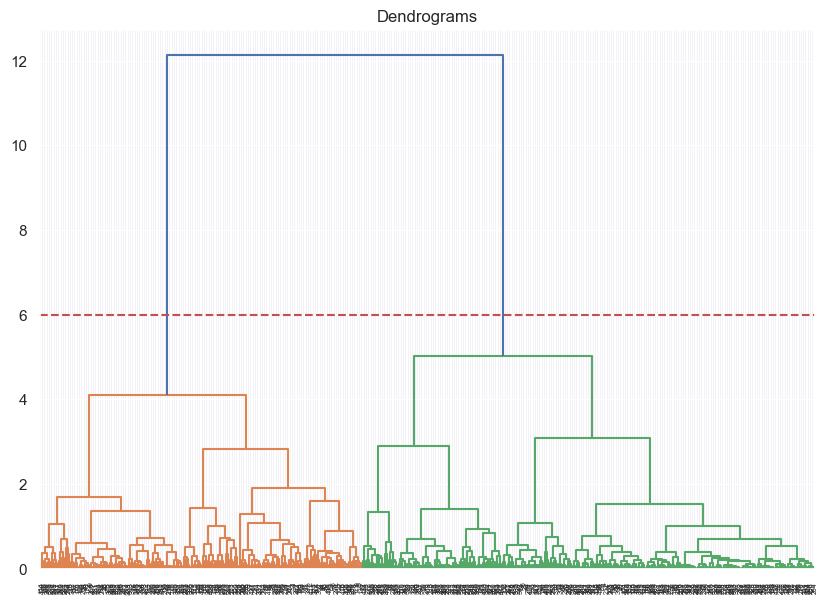

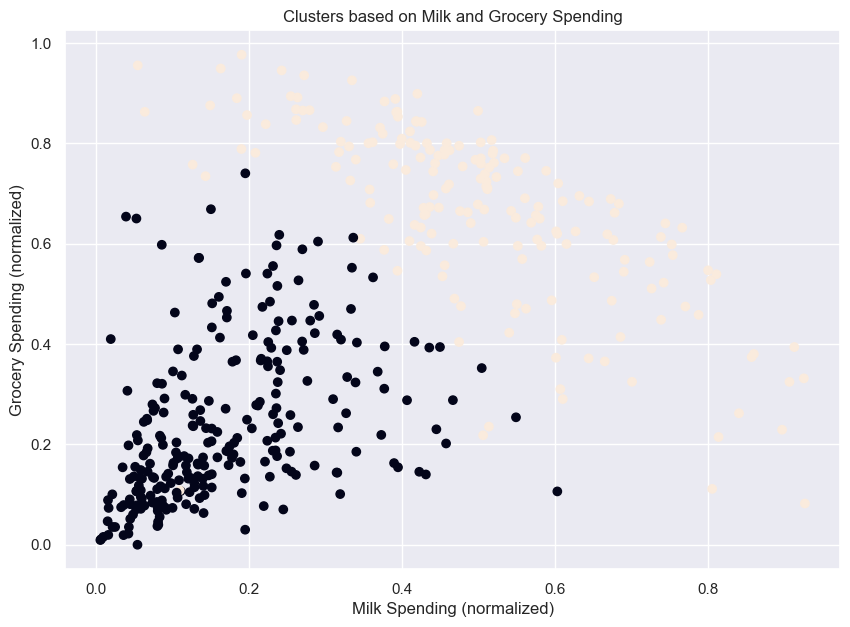

In [7]:
# Import necessary libraries
import os  # For interacting with the operating system
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
from sklearn.preprocessing import normalize  # For normalizing data
import scipy.cluster.hierarchy as shc  # For hierarchical clustering
from sklearn.cluster import AgglomerativeClustering  # For agglomerative clustering

# Load the Wholesale Customers dataset
data = pd.read_csv('w.csv')  # Read the CSV file into a DataFrame
print(data.head())  # Display the first five rows of the DataFrame to understand its structure

# Normalize the dataset for effective clustering
data_scaled = normalize(data)  # Normalize the data to bring all features to the same scale
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)  # Convert the normalized data back to a DataFrame with original columns
print(data_scaled.head())  # Display the first five rows of the scaled data

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))  # Set the figure size for the plot
plt.title("Dendrograms")  # Set the title for the plot
d = shc.dendrogram(shc.linkage(data_scaled, method='ward'))  # Generate the dendrogram using Ward's method

# Add a horizontal line to indicate the cutoff for clusters
plt.axhline(y=6, color='r', linestyle='--')  # Draw a dashed red line at y=6 to show the cutoff for clusters

# Apply Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')  # Create an AgglomerativeClustering model with 2 clusters
print(cluster.fit_predict(data_scaled))  # Fit the model on the scaled data and predict cluster labels

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 7))  # Set the figure size for the scatter plot
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)  # Plot 'Milk' vs 'Grocery', colored by cluster labels
plt.title("Clusters based on Milk and Grocery Spending")  # Set the title for the scatter plot
plt.xlabel("Milk Spending (normalized)")  # Set the x-axis label
plt.ylabel("Grocery Spending (normalized)")  # Set the y-axis label
plt.show()  # Display the plot
    

In [8]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling features and encoding categorical variables
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation metrics
from sklearn.impute import SimpleImputer  # For handling missing values

# Load the Adult Census Income dataset
df = pd.read_csv('a.csv', header=None)  # Read the CSV file into a DataFrame without headers

# Assign column names to the DataFrame for clarity
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
           'marital.status', 'occupation', 'relationship', 'race',
           'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
           'native.country', 'income']  # List of column names for better understanding
df.columns = columns  # Assign the column names to the DataFrame

# Handle missing values
df = df.replace(' ?', np.nan)  # Replace any occurrence of '?' in the dataset with NaN (Not a Number)
df.dropna(inplace=True)  # Drop rows that contain any NaN values, cleaning the dataset

# Encode categorical features using Label Encoding
label_encoders = {}  # Initialize a dictionary to store label encoders for each categorical column
for column in ['workclass', 'education', 'marital.status',
               'occupation', 'relationship', 'race', 'sex', 
               'native.country', 'income']:  # List of categorical columns to encode
    le = LabelEncoder()  # Create a LabelEncoder object
    df[column] = le.fit_transform(df[column])  # Fit and transform the categorical data to numerical values
    label_encoders[column] = le  # Store the label encoder for potential inverse transformation later

# Separate features (X) and target variable (y)
X = df.drop('income', axis=1)  # Features: all columns except 'income' (input variables)
y = df['income']  # Target variable: 'income' column (output variable)

# Check if all columns in X are numeric
print("Data Types in X before Imputation:")  # Print message indicating the next output
print(X.dtypes)  # Display the data types of the columns in X

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coercing errors to NaN

# Check for any non-numeric values after conversion
print("\nData Types in X after ensuring numeric:")  # Print message indicating the next output
print(X.dtypes)  # Display the data types of the columns in X after conversion

# Impute missing values in features (if any)
imputer = SimpleImputer(strategy='mean')  # Initialize imputer with mean strategy for filling NaN values
X_imputed = imputer.fit_transform(X)  # Fit the imputer and transform the data, filling NaN values

# Scale the features to have mean = 0 and variance = 1
scaler = StandardScaler()  # Initialize the scaler
X_scaled = scaler.fit_transform(X_imputed)  # Scale the imputed data to standardize features

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Initialize PCA to reduce to 5 principal components
X_pca = pca.fit_transform(X_scaled)  # Fit PCA on the scaled data and transform it to the new feature space

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)  # Split data with 30% for testing

# Train a Logistic Regression model on the reduced dataset
model = LogisticRegression()  # Initialize the logistic regression model
model.fit(X_train, y_train)  # Fit the model on the training data

# Make predictions on the test set
y_pred = model.predict(X_test)  # Generate predictions for the test set

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))  # Print the accuracy score of the model
print("Confusion Matrix:")  
print(confusion_matrix(y_test, y_pred))  # Print the confusion matrix to see classification results
print("Classification Report:")  
print(classification_report(y_test, y_pred))  # Print a detailed classification report with precision, recall, and F1 scores

# Additional analysis: Explained variance ratio of PCA components
explained_variance = pca.explained_variance_ratio_  # Retrieve the explained variance ratio for each principal component
print("\nExplained Variance Ratio of PCA components:")  # Print message indicating the next output
for i, var in enumerate(explained_variance):  # Loop through each component's variance ratio
    print(f"Principal Component {i + 1}: {var:.2f}")  # Print the explained variance ratio for each component


Data Types in X before Imputation:
age               object
workclass          int64
fnlwgt            object
education          int64
education.num     object
marital.status     int64
occupation         int64
relationship       int64
race               int64
sex                int64
capital.gain      object
capital.loss      object
hours.per.week    object
native.country     int64
dtype: object

Data Types in X after ensuring numeric:
age               float64
workclass           int64
fnlwgt            float64
education           int64
education.num     float64
marital.status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country      int64
dtype: object
Accuracy Score: 0.7999727018358015
Confusion Matrix:
[[10414   760     0]
 [ 2170  1308     0]
 [    1     0     0]]
Classification Report:
              precision    recall  f1-scor

c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo